In [1]:
import pandas as pd
import math
import numpy as np
#import geocoder
import matplotlib.pyplot as plt
from skbio import diversity
import collections
from collections import Counter
import seaborn as sns; sns.set(color_codes=True)
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='alok123t', api_key='IpIxJXX4qXVHREi5Z74j')

In [2]:
df = pd.read_csv('Dataset.csv.gz')
df.shape

(211040, 57)

## Adding top 3 Ethnicity and Nationality labels to the dataset:

In [ ]:
# Add Ethnicity, Nationality labels and values
top_n = 3
df_eth = df[df.columns[12:18]]
eth_vals = np.sort(df_eth, axis=1)[:,-top_n:]
df_eth_vals = pd.DataFrame(eth_vals, columns=['EthnicityValue3', 'EthnicityValue2', 'EthnicityValue1'])
df_eth_vals.head()

df_eth_labels_idx = np.argsort(df_eth, axis=1).iloc[:,-top_n:]
eth_labels = df_eth.columns.to_series()[df_eth_labels_idx.values[:,::-1][:,:top_n]]
df_eth_labels = pd.DataFrame(eth_labels, columns=['EthnicityLabel1', 'EthnicityLabel2', 'EthnicityLabel3'])
df_eth_labels.head()

df_nat = df[df.columns[18:57]]
nat_vals = np.sort(df_nat, axis=1)[:,-top_n:]
df_nat_vals = pd.DataFrame(nat_vals, columns=['NationalityValue3', 'NationalityValue2', 'NationalityValue1'])
df_nat_vals.head()

df_nat_labels_idx = np.argsort(df_nat, axis=1).iloc[:,-top_n:]
nat_labels = df_nat.columns.to_series()[df_nat_labels_idx.values[:,::-1][:,:top_n]]
df_nat_labels = pd.DataFrame(nat_labels, columns=['NationalityLabel1', 'NationalityLabel2', 'NationalityLabel3'])
df_nat_labels.head()

output_cols = ['institution_name', 'overall_rating', 'rating_class', 'tDept', 'tFname', 'tLname', 'tMiddlename', 'tNumRatings']
df = pd.concat([df[output_cols], df_eth_labels, df_eth_vals, df_nat_labels, df_nat_vals], axis=1)
df.head()

# Remove rows with tDept column value Not Specified
df = df[df['tDept'] != 'Not Specified']

# Add State label
univs = df['institution_name'].unique()
states = dict(map(lambda x: (x, geocoder.google(x).state), univs))
df['states'] = df['institution_name'].map(lambda x: states[x])

# Add Public / Private label
public_univs_list = ['University of California Berkeley','University of California Los Angeles (UCLA)','University of Virginia','University of Michigan', 'University of North Carolina at Chapel Hill','College of William and Mary','Georgia Institute of Technology', 'University of California Santa Barbara','University of California Irvine','University of California San Diego', 'University of Florida','University of California Davis', 'University of Wisconsin - Madison', 'Pennsylvania State University', 'University Of Illinois at Urbana-Champaign', 'The Ohio State University', 'University of Connecticut', 'University of Texas at Austin', 'University of Washington', 'University of Maryland', 'Clemson University', 'University of Pittsburgh', 'Rutgers - State University of New Jersey', 'Texas A&M University at College Station', 'University of Minnesota-Twin Cities', 'Virginia Tech', 'Colorado School of Mines', 'University of Massachusetts', 'Miami University', 'University of Iowa', 'Florida State University', 'Michigan State University', 'North Carolina State University', 'University of California Santa Cruz', 'University of Delaware', 'Binghamton University (SUNY)', 'Indiana University Bloomington', 'University of Colorado-Boulder', 'Stony Brook University (SUNY)', 'SUNY College of Environmental Science and Forestry', 'University at Buffalo (SUNY Buffalo)', 'University of Oklahoma', 'University of Vermont']
df['public'] = df['institution_name'].isin(public_univs_list)

df.to_csv('Faculty.csv.gz', index=False, compression='gzip')

In [ ]:
df.head()

## Loading Final Dataset:

In [3]:
df = pd.read_csv('Faculty.csv.gz')
df.shape

(209832, 24)

In [4]:
df.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
0,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,White,Black,...,CelticEnglish,"Muslim,Nubian","African,EastAfrican",0.1595,0.2614,0.3219,NJ,False,1,1
1,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,White,Hispanic,...,"Hispanic,Spanish",CelticEnglish,"European,French",0.0579,0.0695,0.7500,NJ,False,1,1
2,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,White,Black,...,"Muslim,Turkic,Turkey","European,German",CelticEnglish,0.0109,0.0593,0.9056,NJ,False,1,1
3,Princeton University,4.5,good,Languages,Kun,An,NaN,2,API,White,...,"EastAsian,Indochina,Vietnam","EastAsian,Malay,Indonesia","European,German",0.0102,0.0227,0.9240,NJ,False,1,1
4,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,White,Black,...,CelticEnglish,"European,German","European,French",0.0086,0.0122,0.9539,NJ,False,1,1


In [5]:
# Add rank for each university
univ_rank = {}
rank = 1
for univ in df.institution_name.unique():
    univ_rank[univ] = rank
    rank += 1
    
df['institution_rank'] = df['institution_name'].map(univ_rank)
df.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
0,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,White,Black,...,CelticEnglish,"Muslim,Nubian","African,EastAfrican",0.1595,0.2614,0.3219,NJ,False,1,1
1,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,White,Hispanic,...,"Hispanic,Spanish",CelticEnglish,"European,French",0.0579,0.0695,0.7500,NJ,False,1,1
2,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,White,Black,...,"Muslim,Turkic,Turkey","European,German",CelticEnglish,0.0109,0.0593,0.9056,NJ,False,1,1
3,Princeton University,4.5,good,Languages,Kun,An,NaN,2,API,White,...,"EastAsian,Indochina,Vietnam","EastAsian,Malay,Indonesia","European,German",0.0102,0.0227,0.9240,NJ,False,1,1
4,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,White,Black,...,CelticEnglish,"European,German","European,French",0.0086,0.0122,0.9539,NJ,False,1,1


# Diversity calculations using Simpson Index:

## Statewise Ethnicity and Nationality Diversity:
#### (Combining all the Universities in each State)

In [6]:
#Ethnicity Calculation
eth_state=collections.OrderedDict()
eth_map={'White':0, 'API':1, 'Hispanic':2, 'Black':3, 'AIAN':4, '2PRACE':5}
for index, row in df.iterrows():
    key = row['states']
    value = row['EthnicityLabel1']
    if key not in eth_state:
        eth_state[key] = [0]*6
    eth_state[key][eth_map[value]] += 1
    
simpson_eth_states = collections.OrderedDict()
for state in eth_state:
    simpson_eth_states[state] = diversity.alpha.simpson(eth_state[state])
    
#Nationality Calculation
nationality_state=collections.OrderedDict()
nat_map={'CelticEnglish':0, 'Hispanic,Spanish':1, 'Muslim,Turkic,Turkey':2, 'EastAsian,Indochina,Vietnam':3, 'European,French':4,
         'SouthAsian':5, 'Muslim,Pakistanis,Pakistan':6, 'Hispanic,Portuguese':7,'European,Russian':8, 'European,German':9,
         'Hispanic,Philippines':10,'EastAsian,Chinese':11, 'European,Italian,Italy':12, 'Muslim,Nubian':13,
         'EastAsian,Malay,Indonesia':14, 'Nordic,Scandinavian,Norway':15,'European,EastEuropean':16, 'EastAsian,South Korea':17,
         'EastAsian,Japan':18,'Greek':19, 'African,EastAfrican':20, 'European,Italian,Romania':21, 'Muslim,Persian':22,
         'Nordic,Scandinavian,Denmark':23, 'African,WestAfrican':24, 'Muslim,ArabianPeninsula':25, 'Nordic,Scandinavian,Sweden':26,
         'Jewish':27, 'European,Baltics':28, 'European,SouthSlavs':29, 'EastAsian,Malay,Malaysia':30, 'Nordic,Finland':31,
         'African,SouthAfrican':32, 'EastAsian,Indochina,Myanmar':33, 'Muslim,Pakistanis,Bangladesh':34, 'EastAsian,Indochina,Thailand':35,
         'Muslim,Turkic,CentralAsian':36, 'Muslim,Maghreb':37, 'EastAsian,Indochina,Cambodia':38}

for index, row in df.iterrows():
    key = row['states']
    value = row['NationalityLabel1']
    if key not in nationality_state:
        nationality_state[key] = [0]*39
    nationality_state[key][nat_map[value]] += 1
    
simpson_nat_states = collections.OrderedDict()
for state in nationality_state:
    simpson_nat_states[state] = diversity.alpha.simpson(nationality_state[state])
    
    
#Merging Results
state_simpson_nat_eth = pd.DataFrame({'states':list(simpson_nat_states.keys()),'simpson_nat_states':list(simpson_nat_states.values()),'simpson_eth_states':list(simpson_eth_states.values())})
state_simpson_nat_eth.head()

,simpson_eth_states,simpson_nat_states,states
0,0.297609,0.706071,NJ
1,0.222127,0.644345,MA
2,0.302141,0.663627,IL
3,0.278722,0.652373,CT
4,0.268361,0.668554,NY


## Ethnicity by State Visualization:

In [ ]:
scl = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    
data = [ dict(type='choropleth',colorscale = scl,autocolorscale = False,locationmode = 'USA-states',
        locations = list(state_simpson_nat_eth.states),
        z = list(state_simpson_nat_eth.simpson_eth_states),zmax = 0.4,zmin = 0,
        text = 'Ethnicity Diversity by State.',
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2) ),
        colorbar = dict(title = "Diversity (Simpson Index)")) ]

layout = dict(
        title = 'Ethnicity Diversity by State.',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)'),)

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## Nationality by State Visualization:

In [ ]:
scl = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    
data = [ dict(type='choropleth',colorscale = scl,autocolorscale = False,
        locations = list(state_simpson_nat_eth.states),
        z = list(state_simpson_nat_eth.simpson_nat_states),zmax = 0.8,zmin = 0,
        locationmode = 'USA-states',
        text = 'Nationality Diversity by State.',
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2) ),
        colorbar = dict(title = "Diversity (Simpson Index)")) ]

layout = dict(
        title = 'Nationality Diversity by State.',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)'),)

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

### Correlation between Statewise Diversity of Nationality and Ethnicity:

In [7]:
np.corrcoef(list(state_simpson_nat_eth.simpson_eth_states),list(state_simpson_nat_eth.simpson_nat_states))

array([[ 1.        ,  0.86564235],
       [ 0.86564235,  1.        ]])

In [8]:
d = Counter(dict(simpson_nat_states))
for k, v in d.most_common(3):
    print(k, v)

NJ 0.706071058023
NY 0.668554428482
CA 0.665989331677


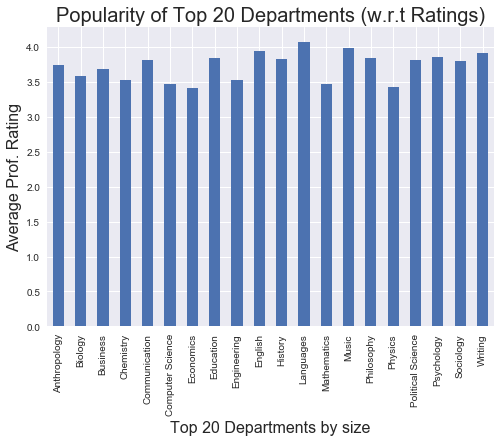

In [11]:
top20_depts = list(df.tDept.value_counts().index)
top20_depts = top20_depts[:20]
dept_rating = df[df['tDept'].isin(top20_depts)]
dept_rating=dept_rating.groupby('tDept').mean()

y4 = list(dept_rating.overall_rating)
'''y44 = [incom for incom in y4 if str(incom) != 'nan']
low = min(y44)
high = max(y44)
plt.ylim([math.floor(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
'''
dept_rating.overall_rating.plot.bar()
plt.title("Popularity of Top 20 Departments (w.r.t Ratings)", fontsize= 20)
plt.xlabel('Top 20 Departments by size', fontsize=16)
plt.ylabel('Average Prof. Rating', fontsize=16)
plt.show()

In [12]:
cs = df[df['tDept']=='Computer Science']
cs.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
7,Princeton University,3.5,good,Computer Science,Andrew,Appel,NaN,2,White,Hispanic,...,CelticEnglish,"European,German","Hispanic,Portuguese",0.0636,0.2350,0.6232,NJ,False,1,1
10,Princeton University,2.5,average,Computer Science,Sanjeev,Arora,NaN,4,API,White,...,SouthAsian,CelticEnglish,"EastAsian,Japan",0.0000,0.0015,0.9985,NJ,False,1,1
14,Princeton University,4.5,good,Computer Science,David,August,NaN,4,White,Black,...,CelticEnglish,"European,German","African,EastAfrican",0.0805,0.1266,0.5068,NJ,False,1,1
24,Princeton University,NaN,zero,Computer Science,Andy,Bavier,NaN,0,White,Hispanic,...,CelticEnglish,"EastAsian,Malay,Indonesia","EastAsian,Chinese",0.0668,0.0763,0.6149,NJ,False,1,1
55,Princeton University,3.5,good,Computer Science,Douglas,Clark,NaN,1,White,Black,...,CelticEnglish,"Hispanic,Portuguese","Hispanic,Spanish",0.0086,0.0454,0.9299,NJ,False,1,1


In [13]:
#Ethnicity Calculation
eth_cs=collections.OrderedDict()
eth_map={'White':0, 'API':1, 'Hispanic':2, 'Black':3, 'AIAN':4, '2PRACE':5}
for index, row in cs.iterrows():
    key = row['states']
    value = row['EthnicityLabel1']
    if key not in eth_cs:
        eth_cs[key] = [0]*6
    eth_cs[key][eth_map[value]] += 1
    
simpson_eth_cs = collections.OrderedDict()
for state in eth_cs:
    simpson_eth_cs[state] = diversity.alpha.simpson(eth_cs[state])
    
#Nationality Calculation
nationality_cs=collections.OrderedDict()
nat_map={'CelticEnglish':0, 'Hispanic,Spanish':1, 'Muslim,Turkic,Turkey':2, 'EastAsian,Indochina,Vietnam':3, 'European,French':4,
         'SouthAsian':5, 'Muslim,Pakistanis,Pakistan':6, 'Hispanic,Portuguese':7,'European,Russian':8, 'European,German':9,
         'Hispanic,Philippines':10,'EastAsian,Chinese':11, 'European,Italian,Italy':12, 'Muslim,Nubian':13,
         'EastAsian,Malay,Indonesia':14, 'Nordic,Scandinavian,Norway':15,'European,EastEuropean':16, 'EastAsian,South Korea':17,
         'EastAsian,Japan':18,'Greek':19, 'African,EastAfrican':20, 'European,Italian,Romania':21, 'Muslim,Persian':22,
         'Nordic,Scandinavian,Denmark':23, 'African,WestAfrican':24, 'Muslim,ArabianPeninsula':25, 'Nordic,Scandinavian,Sweden':26,
         'Jewish':27, 'European,Baltics':28, 'European,SouthSlavs':29, 'EastAsian,Malay,Malaysia':30, 'Nordic,Finland':31,
         'African,SouthAfrican':32, 'EastAsian,Indochina,Myanmar':33, 'Muslim,Pakistanis,Bangladesh':34, 'EastAsian,Indochina,Thailand':35,
         'Muslim,Turkic,CentralAsian':36, 'Muslim,Maghreb':37, 'EastAsian,Indochina,Cambodia':38}

for index, row in cs.iterrows():
    key = row['states']
    value = row['NationalityLabel1']
    if key not in nationality_cs:
        nationality_cs[key] = [0]*39
    nationality_cs[key][nat_map[value]] += 1
    
simpson_nat_cs = collections.OrderedDict()
for state in nationality_cs:
    simpson_nat_cs[state] = diversity.alpha.simpson(nationality_cs[state])
    
    
#Merging Results
cs_simpson_nat_eth = pd.DataFrame({'states':list(simpson_nat_cs.keys()),'simpson_nat_cs':list(simpson_nat_cs.values()),'simpson_eth_cs':list(simpson_eth_cs.values())})
cs_simpson_nat_eth.head()

,simpson_eth_cs,simpson_nat_cs,states
0,0.432415,0.823395,NJ
1,0.275611,0.716771,MA
2,0.434580,0.730536,IL
3,0.428062,0.801427,CT
4,0.401092,0.765768,NY


In [ ]:
scl = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    
data = [ dict(type='choropleth',colorscale = scl,autocolorscale = False,locationmode = 'USA-states',
        locations = list(cs_simpson_nat_eth.states),
        z = list(cs_simpson_nat_eth.simpson_eth_cs),zmax = 0.4,zmin = 0,
        text = 'Ethnicity Diversity by State.',
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2) ),
        colorbar = dict(title = "Diversity (Simpson Index)")) ]

layout = dict(
        title = 'CS Department Ethnicity Diversity by State.',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)'),)

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
scl = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    
data = [ dict(type='choropleth',colorscale = scl,autocolorscale = False,
        locations = list(cs_simpson_nat_eth.states),
        z = list(cs_simpson_nat_eth.simpson_nat_cs),zmax = 0.8,zmin = 0,
        locationmode = 'USA-states',
        text = 'Nationality Diversity by State.',
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2) ),
        colorbar = dict(title = "Diversity (Simpson Index)")) ]

layout = dict(
        title = 'CS Department Nationality Diversity by State.',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)'),)

fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [14]:
#Ethnicity Calculation
eth_university=collections.OrderedDict()
eth_map={'White':0, 'API':1, 'Hispanic':2, 'Black':3, 'AIAN':4, '2PRACE':5}
for index, row in df.iterrows():
    key = row['institution_name']
    value = row['EthnicityLabel1']
    if key not in eth_university:
        eth_university[key] = [0]*6
    eth_university[key][eth_map[value]] += 1
    
simpson_eth_university = collections.OrderedDict()
for state in eth_university:
    simpson_eth_university[state] = diversity.alpha.simpson(eth_university[state])
    
#Nationality Calculation
nationality_university=collections.OrderedDict()
nat_map={'CelticEnglish':0, 'Hispanic,Spanish':1, 'Muslim,Turkic,Turkey':2, 'EastAsian,Indochina,Vietnam':3, 'European,French':4,
         'SouthAsian':5, 'Muslim,Pakistanis,Pakistan':6, 'Hispanic,Portuguese':7,'European,Russian':8, 'European,German':9,
         'Hispanic,Philippines':10,'EastAsian,Chinese':11, 'European,Italian,Italy':12, 'Muslim,Nubian':13,
         'EastAsian,Malay,Indonesia':14, 'Nordic,Scandinavian,Norway':15,'European,EastEuropean':16, 'EastAsian,South Korea':17,
         'EastAsian,Japan':18,'Greek':19, 'African,EastAfrican':20, 'European,Italian,Romania':21, 'Muslim,Persian':22,
         'Nordic,Scandinavian,Denmark':23, 'African,WestAfrican':24, 'Muslim,ArabianPeninsula':25, 'Nordic,Scandinavian,Sweden':26,
         'Jewish':27, 'European,Baltics':28, 'European,SouthSlavs':29, 'EastAsian,Malay,Malaysia':30, 'Nordic,Finland':31,
         'African,SouthAfrican':32, 'EastAsian,Indochina,Myanmar':33, 'Muslim,Pakistanis,Bangladesh':34, 'EastAsian,Indochina,Thailand':35,
         'Muslim,Turkic,CentralAsian':36, 'Muslim,Maghreb':37, 'EastAsian,Indochina,Cambodia':38}

for index, row in df.iterrows():
    key = row['institution_name']
    value = row['NationalityLabel1']
    if key not in nationality_university:
        nationality_university[key] = [0]*39
    nationality_university[key][nat_map[value]] += 1
    
simpson_nat_university = collections.OrderedDict()
for state in nationality_university:
    simpson_nat_university[state] = diversity.alpha.simpson(nationality_university[state])
    
    
#Merging Results
university_simpson_nat_eth = pd.DataFrame({'institution_name':list(simpson_nat_university.keys()),'simpson_nat_university':list(simpson_nat_university.values()),'simpson_eth_university':list(simpson_eth_university.values())})
university_simpson_nat_eth.head()

,institution_name,simpson_eth_university,simpson_nat_university
0,Princeton University,0.196707,0.632922
1,Harvard University,0.181666,0.599695
2,University of Chicago,0.217054,0.640644
3,Yale University,0.200862,0.581551
4,Columbia University,0.254516,0.688432


In [20]:
university_simpson_nat_eth.columns.name='institution_rank'
university_simpson_eth10 = university_simpson_nat_eth.sort_values(by='simpson_eth_university', ascending=False).head(10)
university_simpson_eth10 = university_simpson_eth10.loc[:, ['institution_name', 'simpson_eth_university']]
university_simpson_nat10 = university_simpson_nat_eth.sort_values(by='simpson_nat_university', ascending=False).head(10)
university_simpson_nat10 = university_simpson_nat10.loc[:, ['institution_name', 'simpson_nat_university']]
university_simpson = university_simpson_nat_eth.sort_index()
university_simpson = university_simpson.loc[:, ['simpson_eth_university', 'simpson_nat_university']]
university_simpson = university_simpson/university_simpson.max().astype(np.float64)
university_simpson.head()

institution_rank,simpson_eth_university,simpson_nat_university
0,0.548092,0.831064
1,0.506181,0.787434
2,0.604785,0.841203
3,0.559668,0.763610
4,0.709168,0.903952


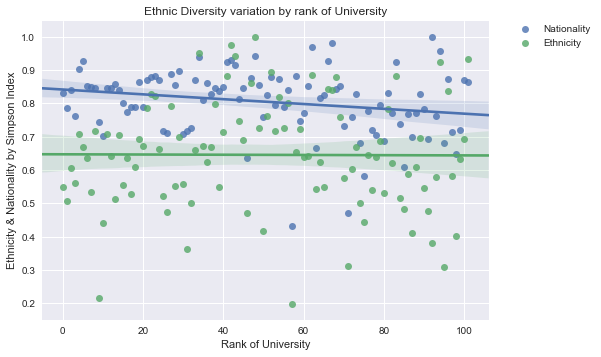

In [21]:
sns.regplot(x=pd.Series(university_simpson.index.values), y=university_simpson.simpson_nat_university, label="Nationality")
sns.regplot(x=pd.Series(university_simpson.index.values), y=university_simpson.simpson_eth_university, label="Ethnicity")
plt.xlabel('Rank of University')
plt.ylabel('Ethnicity & Nationality by Simpson Index')
plt.title('Ethnic Diversity variation by rank of University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
pri = df[df['public']==False]
pub = df[df['public']==True]

In [24]:
#Ethnicity Calculation
eth_pri=collections.OrderedDict()
eth_map={'White':0, 'API':1, 'Hispanic':2, 'Black':3, 'AIAN':4, '2PRACE':5}
for index, row in pri.iterrows():
    key = row['institution_name']
    value = row['EthnicityLabel1']
    if key not in eth_pri:
        eth_pri[key] = [0]*6
    eth_pri[key][eth_map[value]] += 1
    
simpson_eth_pri = collections.OrderedDict()
for state in eth_pri:
    simpson_eth_pri[state] = diversity.alpha.simpson(eth_pri[state])
    
#Nationality Calculation
nationality_pri=collections.OrderedDict()
nat_map={'CelticEnglish':0, 'Hispanic,Spanish':1, 'Muslim,Turkic,Turkey':2, 'EastAsian,Indochina,Vietnam':3, 'European,French':4,
         'SouthAsian':5, 'Muslim,Pakistanis,Pakistan':6, 'Hispanic,Portuguese':7,'European,Russian':8, 'European,German':9,
         'Hispanic,Philippines':10,'EastAsian,Chinese':11, 'European,Italian,Italy':12, 'Muslim,Nubian':13,
         'EastAsian,Malay,Indonesia':14, 'Nordic,Scandinavian,Norway':15,'European,EastEuropean':16, 'EastAsian,South Korea':17,
         'EastAsian,Japan':18,'Greek':19, 'African,EastAfrican':20, 'European,Italian,Romania':21, 'Muslim,Persian':22,
         'Nordic,Scandinavian,Denmark':23, 'African,WestAfrican':24, 'Muslim,ArabianPeninsula':25, 'Nordic,Scandinavian,Sweden':26,
         'Jewish':27, 'European,Baltics':28, 'European,SouthSlavs':29, 'EastAsian,Malay,Malaysia':30, 'Nordic,Finland':31,
         'African,SouthAfrican':32, 'EastAsian,Indochina,Myanmar':33, 'Muslim,Pakistanis,Bangladesh':34, 'EastAsian,Indochina,Thailand':35,
         'Muslim,Turkic,CentralAsian':36, 'Muslim,Maghreb':37, 'EastAsian,Indochina,Cambodia':38}

for index, row in pri.iterrows():
    key = row['institution_name']
    value = row['NationalityLabel1']
    if key not in nationality_pri:
        nationality_pri[key] = [0]*39
    nationality_pri[key][nat_map[value]] += 1
    
simpson_nat_pri = collections.OrderedDict()
for state in nationality_pri:
    simpson_nat_pri[state] = diversity.alpha.simpson(nationality_pri[state])
    
    
#Merging Results
university_simpson_nat_eth_pri = pd.DataFrame({'institution_name':list(simpson_nat_pri.keys()),'simpson_nat_pri':list(simpson_nat_pri.values()),'simpson_eth_pri':list(simpson_eth_pri.values())})
university_simpson_nat_eth_pri.head()

,institution_name,simpson_eth_pri,simpson_nat_pri
0,Princeton University,0.196707,0.632922
1,Harvard University,0.181666,0.599695
2,University of Chicago,0.217054,0.640644
3,Yale University,0.200862,0.581551
4,Columbia University,0.254516,0.688432


In [26]:
#Ethnicity Calculation
eth_pub=collections.OrderedDict()
eth_map={'White':0, 'API':1, 'Hispanic':2, 'Black':3, 'AIAN':4, '2PRACE':5}
for index, row in pub.iterrows():
    key = row['institution_name']
    value = row['EthnicityLabel1']
    if key not in eth_pub:
        eth_pub[key] = [0]*6
    eth_pub[key][eth_map[value]] += 1
    
simpson_eth_pub = collections.OrderedDict()
for state in eth_pub:
    simpson_eth_pub[state] = diversity.alpha.simpson(eth_pub[state])
    
#Nationality Calculation
nationality_pub=collections.OrderedDict()
nat_map={'CelticEnglish':0, 'Hispanic,Spanish':1, 'Muslim,Turkic,Turkey':2, 'EastAsian,Indochina,Vietnam':3, 'European,French':4,
         'SouthAsian':5, 'Muslim,Pakistanis,Pakistan':6, 'Hispanic,Portuguese':7,'European,Russian':8, 'European,German':9,
         'Hispanic,Philippines':10,'EastAsian,Chinese':11, 'European,Italian,Italy':12, 'Muslim,Nubian':13,
         'EastAsian,Malay,Indonesia':14, 'Nordic,Scandinavian,Norway':15,'European,EastEuropean':16, 'EastAsian,South Korea':17,
         'EastAsian,Japan':18,'Greek':19, 'African,EastAfrican':20, 'European,Italian,Romania':21, 'Muslim,Persian':22,
         'Nordic,Scandinavian,Denmark':23, 'African,WestAfrican':24, 'Muslim,ArabianPeninsula':25, 'Nordic,Scandinavian,Sweden':26,
         'Jewish':27, 'European,Baltics':28, 'European,SouthSlavs':29, 'EastAsian,Malay,Malaysia':30, 'Nordic,Finland':31,
         'African,SouthAfrican':32, 'EastAsian,Indochina,Myanmar':33, 'Muslim,Pakistanis,Bangladesh':34, 'EastAsian,Indochina,Thailand':35,
         'Muslim,Turkic,CentralAsian':36, 'Muslim,Maghreb':37, 'EastAsian,Indochina,Cambodia':38}

for index, row in pub.iterrows():
    key = row['institution_name']
    value = row['NationalityLabel1']
    if key not in nationality_pub:
        nationality_pub[key] = [0]*39
    nationality_pub[key][nat_map[value]] += 1
    
simpson_nat_pub = collections.OrderedDict()
for state in nationality_pub:
    simpson_nat_pub[state] = diversity.alpha.simpson(nationality_pub[state])
    
    
#Merging Results
university_simpson_nat_eth_pub = pd.DataFrame({'institution_name':list(simpson_nat_pub.keys()),'simpson_nat_pub':list(simpson_nat_pub.values()),'simpson_eth_pub':list(simpson_eth_pub.values())})
university_simpson_nat_eth_pub.head()

,institution_name,simpson_eth_pub,simpson_nat_pub
0,University of California Berkeley,0.282040,0.663377
1,University of California Los Angeles (UCLA),0.296764,0.669553
2,University of Virginia,0.187676,0.545801
3,University of Michigan,0.284752,0.676186
4,University of North Carolina at Chapel Hill,0.200391,0.540069


In [27]:
pri_mean = university_simpson_nat_eth_pri.mean()
pri_mean

simpson_eth_pri    0.215644
simpson_nat_pri    0.610258
dtype: float64

In [28]:
pub_mean = university_simpson_nat_eth_pub.mean()
pub_mean

simpson_eth_pub    0.253574
simpson_nat_pub    0.617001
dtype: float64